### Cross Validation
    Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. After it, we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below: Prophet has in-built cross-validation technique which will hepls us to perform cross validation

    horizon the forecast horizon
    initial the size of the initial training period
    period the spacing between cutoff dates(like first 6 months)

In [ ]:
df.shape

(1556, 2)

#### Note: 
    Time-Series Cross Validation is not as same as of Machine Learning(sklearn) Cross validation bcz in Time Series we have to divide data on the basis of time-series

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days')

## horizon='365 days'
## Computes forecasts from historical cutoff points. Beginning from

## value of period=180 from documentation of cross_validation as period=0.5*365=180
## value of initial -3*365 from documentation of cross_validation

INFO:fbprophet:Making 1 forecasts with cutoffs between 2016-07-31 00:00:00 and 2016-07-31 00:00:00


In [ ]:
df_cv.shape

(365, 6)

In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-08-01,687.246416,605.007891,766.149673,606.27,2016-07-31
1,2016-08-02,688.461819,608.558760,770.848470,547.47,2016-07-31
2,2016-08-03,687.787785,613.456133,773.924113,566.36,2016-07-31
3,2016-08-04,688.579766,611.439503,778.974321,578.29,2016-07-31
4,2016-08-05,688.732000,607.511924,766.403135,575.04,2016-07-31


### how Cross validation applies on Time series data ::--
    Suppose between 1964-1968-is my Total data
    Then Cross validation will be applied like this:--

    then 1964,1965,1966-Train data

    1967,1968,Test Data

    1968,1969-- Validation Data(whatever new dataset I am creating that will be considered as validation data)

    & in this use-case u will see whatever cv I have done is probably for test-dataset which is df_cv
    1962,1965-Train data

    1965,1966,& through Test Data,I have just cross-validate it

    Obtaining the Performance Metrics
    We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

### plot performance metric

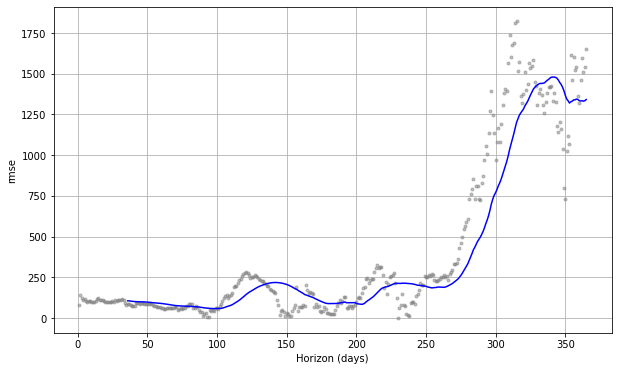

In [ ]:
## lets say I have to plot trend of rmse, 

from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')


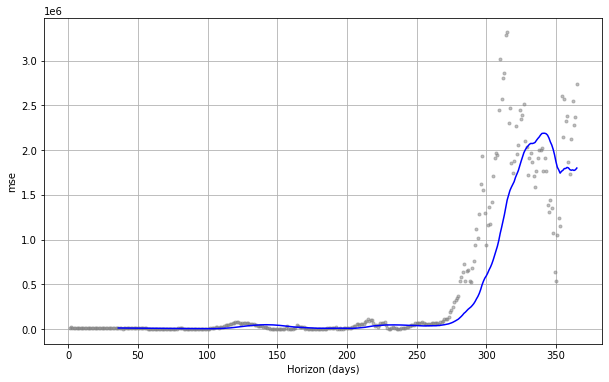

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='mse')